In [1]:
#import the library that we need

import pandas as pd # import pandas as pd # provides fast data analysis structures and tools
import numpy as np # faster way of working with arrays
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder  
import seaborn as sns # to visualize data
import matplotlib.pyplot as plt
import ipywidgets as widgets  # work with the user-friendly interface 


In [2]:
# read and load data
df= pd.read_csv('test_scores.csv')
df


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [3]:
df.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [4]:
# clean data -drop the student_id as it is an independent column
corr_df = df.drop(['student_id'], axis=1)


In [5]:
# Show correlation between variables 
col_list = ['school','school_setting','school_type','classroom','teaching_method','n_student'
            ,'gender','lunch','pretest','posttest']

for i in col_list:
    corr_df[i] = corr_df[i].astype('category').cat.codes
print(' Data Visulation 1 ')
corr_df.corr()


 Data Visulation 1 


,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
school,1.000000,-0.079447,0.330104,-0.050724,-0.041574,0.178557,-0.018751,0.002883,-0.113094,-0.107797
school_setting,-0.079447,1.000000,-0.083307,0.081313,0.082795,0.508018,-0.036581,0.025744,-0.123622,-0.139203
school_type,0.330104,-0.083307,1.000000,0.141215,0.153593,0.548190,0.017593,0.171196,-0.361180,-0.373928
classroom,-0.050724,0.081313,0.141215,1.000000,-0.016094,0.037150,0.005535,0.115873,-0.037016,-0.031087
teaching_method,-0.041574,0.082795,0.153593,-0.016094,1.000000,0.105900,-0.020087,0.017970,-0.115189,-0.312885
n_student,0.178557,0.508018,0.548190,0.037150,0.105900,1.000000,-0.019265,0.367018,-0.499263,-0.504887
gender,-0.018751,-0.036581,0.017593,0.005535,-0.020087,-0.019265,1.000000,-0.016134,0.005947,0.006869
lunch,0.002883,0.025744,0.171196,0.115873,0.017970,0.367018,-0.016134,1.000000,-0.622526,-0.598382
pretest,-0.113094,-0.123622,-0.361180,-0.037016,-0.115189,-0.499263,0.005947,-0.622526,1.000000,0.950959
posttest,-0.107797,-0.139203,-0.373928,-0.031087,-0.312885,-0.504887,0.006869,-0.598382,0.950959,1.000000


Data Visulization 2


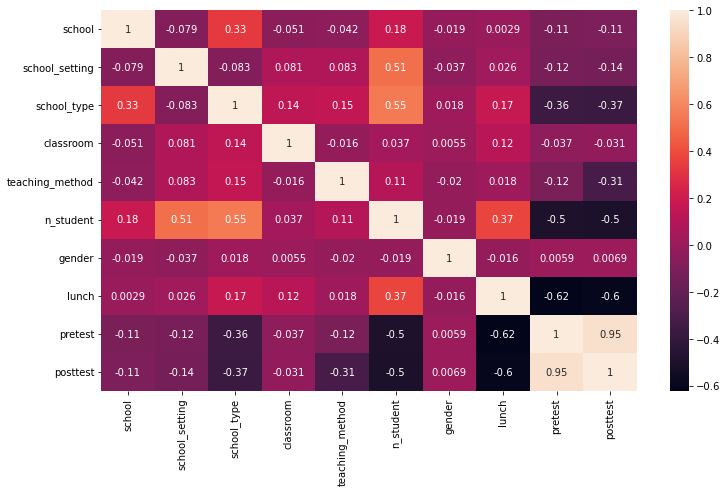

In [6]:
# Show correlation between variables --heatmap 
print('Data Visulization 2')
plt.figure(figsize=(12,7))

sns.heatmap(corr_df.corr(),annot=True)
ax = plt.gca()
plt.show()

Data Description 3


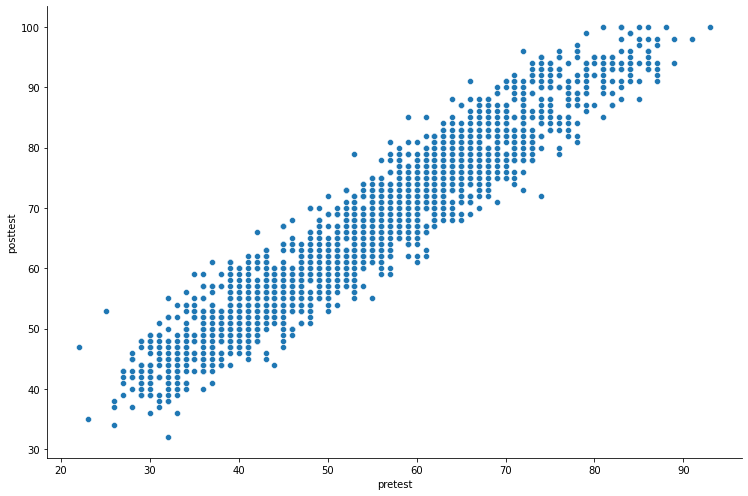

In [7]:
# Strong connectin between pretest and postest score, choose pretest and posttest to work with and display the relation. 
print('Data Description 3')
sns.relplot(x='pretest', y='posttest', data=df,height =7, aspect =1.5)
ax = plt.gca()
plt.show()

Data Description 4


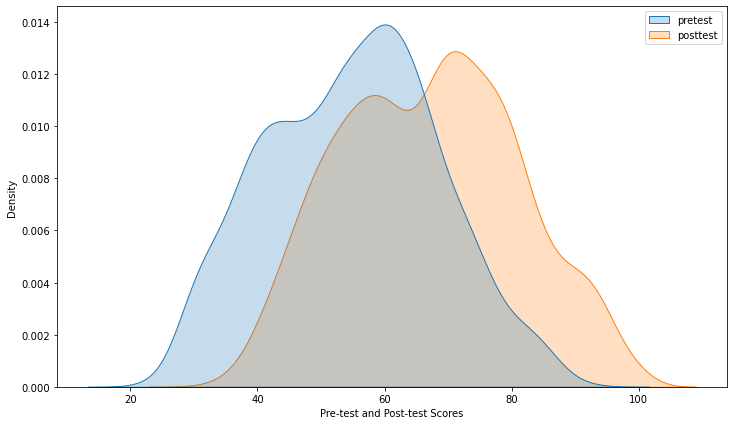

In [8]:
# Descript pretest and posttest-- KDE plot 
print('Data Description 4')
df_binary = df[['pretest', 'posttest']]
plt.figure(figsize=(12,7))
sns.kdeplot(data = df_binary, shade=True)
ax = plt.gca()
ax.set(xlabel = 'Pre-test and Post-test Scores')
plt.show()

# Linear Regression

In [9]:
# split the data into trian and test data , and caculate the score in on the training data to check how will the model perform with new data.  
df =pd.read_csv('test_scores.csv')
x = df[['pretest']]
y =df[['posttest']]

X_train, X_test, y_train, y_test = train_test_split(x, y)

reg=LinearRegression()
reg.fit(X_train,y_train)


print('Training score:')
reg.score(X_train,y_train)




Training score:


0.9075014136351278

In [10]:
print('Testing score:')
reg.score(X_test,y_test)

Testing score:


0.8920204949169568

In [11]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)
y_pred

array([[ 44.50601548],
       [ 70.09187334],
       [ 71.0759448 ],
       [ 56.31487296],
       [ 58.28301587],
       [ 92.72551683],
       [ 38.60158675],
       [ 93.70958829],
       [ 75.01223062],
       [ 48.44230131],
       [ 75.99630208],
       [ 69.10780189],
       [ 74.02815917],
       [ 72.06001625],
       [ 77.96444499],
       [ 78.94851645],
       [ 76.98037354],
       [ 72.06001625],
       [ 43.52194403],
       [ 77.96444499],
       [ 79.9325879 ],
       [ 82.88480227],
       [ 79.9325879 ],
       [ 62.21930169],
       [ 84.85294518],
       [ 75.01223062],
       [ 57.29894441],
       [ 48.44230131],
       [ 51.39451568],
       [ 72.06001625],
       [ 73.04408771],
       [ 75.01223062],
       [ 54.34673004],
       [ 56.31487296],
       [ 75.99630208],
       [ 61.23523024],
       [ 53.36265859],
       [ 71.0759448 ],
       [ 66.15558752],
       [ 72.06001625],
       [ 71.0759448 ],
       [ 77.96444499],
       [ 76.98037354],
       [ 41

Projection visulation


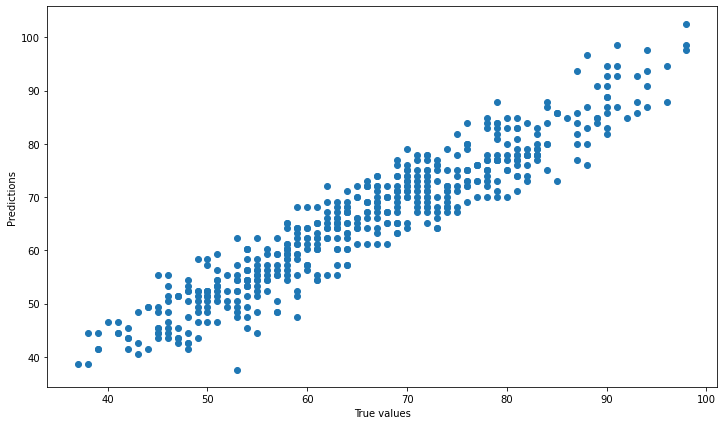

In [12]:
print('Projection visulation')
plt.figure(figsize = (12, 7))
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.scatter(y_test,y_pred)
plt.show()


# User Interface to predict test score 

In [13]:
print('Generate Predict')
input_text = widgets.Text(placeholder = 'Press enter after input...', description = 'Test Score:')
output_text = widgets.Text(description = 'Predict:')
display(input_text)
display(output_text)

def bind_input_to_output(sender):
    output_text.value = str(math.floor(reg.predict([[float(input_text.value)]])))
    
input_text.on_submit(bind_input_to_output)


Generate Predict


Text(value='', description='Test Score:', placeholder='Press enter after input...')

Text(value='', description='Predict:')